In [1]:
using Plots, DataFrames, CSV, Dates

In [2]:
data = CSV.read("KaggleV2-May-2016.csv", DataFrame)

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [3]:
# 1. Parse the datetime strings (they have a trailing "Z", so strip it)
data.ScheduledDT   = DateTime.(replace.(data.ScheduledDay, "Z" => ""), dateformat"yyyy-mm-ddTHH:MM:SS")
data.AppointmentDT = DateTime.(replace.(data.AppointmentDay, "Z" => ""), dateformat"yyyy-mm-ddTHH:MM:SS")

# 2. Keep only the date part (drop time-of-day)
data.ScheduledDate   = Date.(data.ScheduledDT)
data.AppointmentDate = Date.(data.AppointmentDT)

# 3. Compute waiting time in days (scheduled - appointment)
data.lead_time = Dates.value.(data.AppointmentDate .- data.ScheduledDate)
data

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDT,AppointmentDT,ScheduledDate,AppointmentDate,lead_time
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3,DateTime,DateTime,Date,Date,Int64
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29T18:38:08,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29T16:08:27,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29T16:19:04,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29T17:29:31,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29T16:07:23,2016-04-29T00:00:00,2016-04-29,2016-04-29,0
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27T08:36:51,2016-04-29T00:00:00,2016-04-27,2016-04-29,2
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:05:12,2016-04-29T00:00:00,2016-04-27,2016-04-29,2
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:39:58,2016-04-29T00:00:00,2016-04-27,2016-04-29,2
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29T08:02:16,2016-04-29T00:00:00,2016-04-29,2016-04-29,0


In [6]:
# Target variable
using StatsBase
target_counts = countmap(data[!, "No-show"])
println("Target distribution:")
for (k, v) in target_counts
    pct = round(100 * v / nrow(data), digits=2)
    println("  $k: $v ($pct%)")
end

Target distribution:
  Yes: 22319 (20.19%)
  No: 88208 (79.81%)


In [7]:
# Missing values
println("Missing values per column:")
for col in names(data)
    n_missing = sum(ismissing.(data[!, col]))
    if n_missing > 0
        println("  $col: $n_missing")
    end
end

Missing values per column:


In [8]:
# Suspicious values
println("Age < 0: ", sum(data.Age .< 0))
println("Age > 110: ", sum(data.Age .> 110))
println("Lead time < 0: ", sum(data.lead_time .< 0))
println("Lead time > 365: ", sum(data.lead_time .> 365))

# Age statistics
println("\nAge stats:")
println("  Mean: ", round(mean(data.Age), digits=1))
println("  Median: ", median(data.Age))
println("  Min: ", minimum(data.Age))
println("  Max: ", maximum(data.Age))

Age < 0: 1
Age > 110: 5
Lead time < 0: 5
Lead time > 365: 0

Age stats:
  Mean: 37.1
  Median: 37.0
  Min: -1
  Max: 115


In [13]:
# Count rows with Age = -1
println("Rows with Age = -1: ", sum(data.Age .== -1))

# If there are any, print specific columns
if sum(data.Age .== -1) > 0
    bad_age = data[data.Age .== -1, :]
    println("PatientId: ", bad_age.PatientId)
    println("Age: ", bad_age.Age)
    println("Gender: ", bad_age.Gender)
    println("No-show: ", bad_age[!, "No-show"])
end

Rows with Age = -1: 1
PatientId: [4.65943158731293e14]
Age: [-1]
Gender: String1["F"]
No-show: String3["No"]


In [9]:
# Binary features
binary_features = ["Gender", "Scholarship", "Hipertension", "Diabetes", 
                   "Alcoholism", "Handcap", "SMS_received"]

for feat in binary_features
    println("\n$feat:")
    counts = countmap(data[!, feat])
    for (k, v) in sort(collect(counts))
        pct = round(100 * v / nrow(data), digits=2)
        println("  $k: $v ($pct%)")
    end
end


Gender:
  F: 71840 (65.0%)
  M: 38687 (35.0%)

Scholarship:
  0: 99666 (90.17%)
  1: 10861 (9.83%)

Hipertension:
  0: 88726 (80.28%)
  1: 21801 (19.72%)

Diabetes:
  0: 102584 (92.81%)
  1: 7943 (7.19%)

Alcoholism:
  0: 107167 (96.96%)
  1: 3360 (3.04%)

Handcap:
  0: 108286 (97.97%)
  1: 2042 (1.85%)
  2: 183 (0.17%)
  3: 13 (0.01%)
  4: 3 (0.0%)

SMS_received:
  0: 75045 (67.9%)
  1: 35482 (32.1%)


In [10]:
# Lead time
println("Lead time stats:")
println("  Mean: ", round(mean(data.lead_time), digits=1))
println("  Median: ", median(data.lead_time))
println("  Min: ", minimum(data.lead_time))
println("  Max: ", maximum(data.lead_time))
println("  Same day (0): ", sum(data.lead_time .== 0))

Lead time stats:
  Mean: 10.2
  Median: 4.0
  Min: -6
  Max: 179
  Same day (0): 38563


In [15]:
# First, check how many negative lead times we have
println("Rows with negative lead_time: ", sum(data.lead_time .< 0))
println("Percentage: ", round(100 * sum(data.lead_time .< 0) / nrow(data), digits=2), "%")

# Look at a few examples (just print the values, no table)
if sum(data.lead_time .< 0) > 0
    neg_lead = data[data.lead_time .< 0, :]
    println("\nSample of negative lead times:")
    println("First 5 lead times: ", neg_lead.lead_time[1:5])
    println("Scheduled dates: ", neg_lead.ScheduledDate[1:5])
    println("Appointment dates: ", neg_lead.AppointmentDate[1:5])
end

Rows with negative lead_time: 5
Percentage: 0.0%

Sample of negative lead times:
First 5 lead times: [-1, -1, -1, -6, -1]
Scheduled dates: [Date("2016-05-10"), Date("2016-05-18"), Date("2016-05-05"), Date("2016-05-11"), Date("2016-05-04")]
Appointment dates: [Date("2016-05-09"), Date("2016-05-17"), Date("2016-05-04"), Date("2016-05-05"), Date("2016-05-03")]


In [53]:
# Count unique neighbourhoods
num_neighbourhoods = length(unique(data.Neighbourhood))
println("Total number of neighbourhoods: ", num_neighbourhoods)

# Show all neighbourhood names
println("\nAll neighbourhoods:")
for (i, neigh) in enumerate(sort(unique(data.Neighbourhood)))
    println("  $i. $neigh")
end

# Quick stats on neighbourhood sizes
neigh_sizes = combine(groupby(data, :Neighbourhood), nrow => :count)
sort!(neigh_sizes, :count, rev=true)

println("\nNeighbourhood size distribution:")
println("  Largest: $(neigh_sizes[1, :Neighbourhood]) with $(neigh_sizes[1, :count]) appointments")
println("  Smallest: $(neigh_sizes[end, :Neighbourhood]) with $(neigh_sizes[end, :count]) appointments")
println("  Median appointments per neighbourhood: ", median(neigh_sizes.count))
println("  Mean appointments per neighbourhood: ", round(mean(neigh_sizes.count), digits=1))

Total number of neighbourhoods: 81

All neighbourhoods:
  1. AEROPORTO
  2. ANDORINHAS
  3. ANTÔNIO HONÓRIO
  4. ARIOVALDO FAVALESSA
  5. BARRO VERMELHO
  6. BELA VISTA
  7. BENTO FERREIRA
  8. BOA VISTA
  9. BONFIM
  10. CARATOÍRA
  11. CENTRO
  12. COMDUSA
  13. CONQUISTA
  14. CONSOLAÇÃO
  15. CRUZAMENTO
  16. DA PENHA
  17. DE LOURDES
  18. DO CABRAL
  19. DO MOSCOSO
  20. DO QUADRO
  21. ENSEADA DO SUÁ
  22. ESTRELINHA
  23. FONTE GRANDE
  24. FORTE SÃO JOÃO
  25. FRADINHOS
  26. GOIABEIRAS
  27. GRANDE VITÓRIA
  28. GURIGICA
  29. HORTO
  30. ILHA DAS CAIEIRAS
  31. ILHA DE SANTA MARIA
  32. ILHA DO BOI
  33. ILHA DO FRADE
  34. ILHA DO PRÍNCIPE
  35. ILHAS OCEÂNICAS DE TRINDADE
  36. INHANGUETÁ
  37. ITARARÉ
  38. JABOUR
  39. JARDIM CAMBURI
  40. JARDIM DA PENHA
  41. JESUS DE NAZARETH
  42. JOANA D´ARC
  43. JUCUTUQUARA
  44. MARIA ORTIZ
  45. MARUÍPE
  46. MATA DA PRAIA
  47. MONTE BELO
  48. MORADA DE CAMBURI
  49. MÁRIO CYPRESTE
  50. NAZARETH
  51. NOVA PALESTINA
  52. PAR

In [56]:
# Count appointments per neighbourhood
neigh_sizes = combine(groupby(data, :Neighbourhood), nrow => :count)
sort!(neigh_sizes, :count, rev=true)

# How many neighbourhoods appear at least 5 times?
neigh_5plus = filter(row -> row.count >= 55, neigh_sizes)
neigh_less5 = filter(row -> row.count < 55, neigh_sizes)

println("Neighbourhood frequency analysis:")
println("  Neighbourhoods with ≥5 appointments: ", nrow(neigh_5plus))
println("  Neighbourhoods with <5 appointments: ", nrow(neigh_less5))

println("\nTotal appointments in small neighbourhoods (<5): ", sum(neigh_less5.count))
println("Percentage of data in small neighbourhoods: ", 
        round(100 * sum(neigh_less5.count) / nrow(data), digits=2), "%")

# Show the tiny neighbourhoods
if nrow(neigh_less5) > 0
    println("\nNeighbourhoods with <5 appointments:")
    println(neigh_less5)
end

Neighbourhood frequency analysis:
  Neighbourhoods with ≥5 appointments: 76
  Neighbourhoods with <5 appointments: 5

Total appointments in small neighbourhoods (<5): 56
Percentage of data in small neighbourhoods: 0.05%

Neighbourhoods with <5 appointments:
5×2 DataFrame
 Row │ Neighbourhood                count
     │ String31                     Int64
─────┼────────────────────────────────────
   1 │ ILHA DO BOI                     35
   2 │ ILHA DO FRADE                   10
   3 │ AEROPORTO                        8
   4 │ ILHAS OCEÂNICAS DE TRINDADE      2
   5 │ PARQUE INDUSTRIAL                1


In [16]:
using LinearAlgebra

# Numeric columns for correlation
numeric_cols = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                "Alcoholism", "Handcap", "SMS_received", "lead_time"]

# Create matrix
data_matrix = Matrix{Float64}(data[!, numeric_cols])

# Correlation matrix
cor_matrix = cor(data_matrix)

# Print with labels
println("\nCorrelation Matrix:")
println("Columns: ", join(numeric_cols, ", "))
for i in 1:length(numeric_cols)
    print(rpad(numeric_cols[i], 15))
    for j in 1:length(numeric_cols)
        print(rpad(round(cor_matrix[i,j], digits=3), 8))
    end
    println()
end


Correlation Matrix:
Columns: Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, lead_time
Age            1.0     -0.092  0.505   0.292   0.096   0.078   0.013   0.035   
Scholarship    -0.092  1.0     -0.02   -0.025  0.035   -0.009  0.001   -0.03   
Hipertension   0.505   -0.02   1.0     0.433   0.088   0.08    -0.006  -0.017  
Diabetes       0.292   -0.025  0.433   1.0     0.018   0.058   -0.015  -0.027  
Alcoholism     0.096   0.035   0.088   0.018   1.0     0.005   -0.026  -0.039  
Handcap        0.078   -0.009  0.08    0.058   0.005   1.0     -0.024  -0.02   
SMS_received   0.013   0.001   -0.006  -0.015  -0.026  -0.024  1.0     0.398   
lead_time      0.035   -0.03   -0.017  -0.027  -0.039  -0.02   0.398   1.0     


In [17]:
# High correlations (|r| > 0.3, excluding diagonal)
println("\nHigh correlations (|r| > 0.3):")
for i in 1:length(numeric_cols)
    for j in (i+1):length(numeric_cols)
        if abs(cor_matrix[i,j]) > 0.3
            println("  $(numeric_cols[i]) <-> $(numeric_cols[j]): $(round(cor_matrix[i,j], digits=3))")
        end
    end
end


High correlations (|r| > 0.3):
  Age <-> Hipertension: 0.505
  Hipertension <-> Diabetes: 0.433
  SMS_received <-> lead_time: 0.398


In [18]:
# Variance analysis
println("\nFeature variance:")
for col in numeric_cols
    println("  $col: ", round(var(data[!, col]), digits=3))
end


Feature variance:
  Age: 534.082
  Scholarship: 0.089
  Hipertension: 0.158
  Diabetes: 0.067
  Alcoholism: 0.029
  Handcap: 0.026
  SMS_received: 0.218
  lead_time: 232.715


In [19]:
# Convert target to binary
data.no_show_binary = ifelse.(data[!, "No-show"] .== "Yes", 1, 0)

# No-show rate by each binary feature
println("\nNo-show rates by feature:")
for feat in binary_features
    println("\n$feat:")
    for val in sort(unique(data[!, feat]))
        subset = data[data[!, feat] .== val, :]
        rate = mean(subset.no_show_binary) * 100
        n = nrow(subset)
        println("  $val: $(round(rate, digits=2))% (n=$n)")
    end
end


No-show rates by feature:

Gender:
  F: 20.31% (n=71840)
  M: 19.97% (n=38687)

Scholarship:
  0: 19.81% (n=99666)
  1: 23.74% (n=10861)

Hipertension:
  0: 20.9% (n=88726)
  1: 17.3% (n=21801)

Diabetes:
  0: 20.36% (n=102584)
  1: 18.0% (n=7943)

Alcoholism:
  0: 20.19% (n=107167)
  1: 20.15% (n=3360)

Handcap:
  0: 20.24% (n=108286)
  1: 17.92% (n=2042)
  2: 20.22% (n=183)
  3: 23.08% (n=13)
  4: 33.33% (n=3)

SMS_received:
  0: 16.7% (n=75045)
  1: 27.57% (n=35482)


In [21]:
using Pkg
Pkg.add("CategoricalArrays")
using CategoricalArrays

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [22]:
# Correlation between features and binary no-show target
data.no_show_binary = ifelse.(data[!, "No-show"] .== "Yes", 1, 0)

# Add target to correlation matrix
numeric_cols_with_target = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                             "Alcoholism", "Handcap", "SMS_received", "lead_time", 
                             "no_show_binary"]

data_matrix = Matrix{Float64}(data[!, numeric_cols_with_target])
cor_matrix = cor(data_matrix)

# Print correlations with target (last column)
println("\nCorrelation with No-Show:")
for i in 1:(length(numeric_cols_with_target)-1)
    println("  $(numeric_cols_with_target[i]): $(round(cor_matrix[i, end], digits=3))")
end


Correlation with No-Show:
  Age: -0.06
  Scholarship: 0.029
  Hipertension: -0.036
  Diabetes: -0.015
  Alcoholism: -0.0
  Handcap: -0.006
  SMS_received: 0.126
  lead_time: 0.186


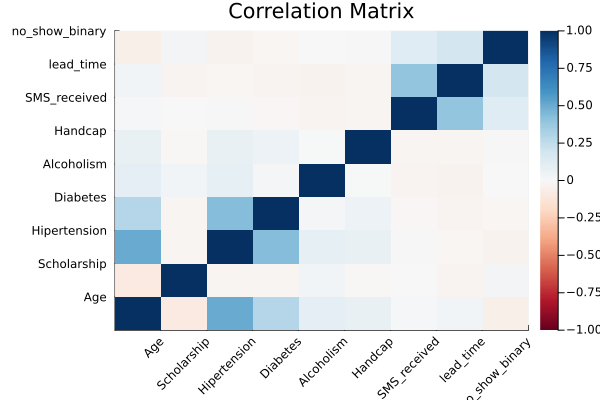

In [23]:
using Plots

# Create correlation matrix
numeric_cols = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                "Alcoholism", "Handcap", "SMS_received", "lead_time", 
                "no_show_binary"]

data_matrix = Matrix{Float64}(data[!, numeric_cols])
cor_matrix = cor(data_matrix)

# Heatmap
heatmap(numeric_cols, numeric_cols, cor_matrix, 
        c=:RdBu, clim=(-1,1), 
        xlabel="", ylabel="", 
        title="Correlation Matrix",
        xticks=(1:length(numeric_cols), numeric_cols),
        yticks=(1:length(numeric_cols), numeric_cols),
        xrotation=45)

In [25]:
using Printf

# Create correlation matrix
numeric_cols = ["Age", "Scholarship", "Hipertension", "Diabetes", 
                "Alcoholism", "Handcap", "SMS_received", "lead_time", 
                "no_show_binary"]

data_matrix = Matrix{Float64}(data[!, numeric_cols])
cor_matrix = cor(data_matrix)

# Print with proper formatting
println("\nCorrelation Matrix with Values:")
println("="^100)

# Header row
print(rpad("", 15))
for col in numeric_cols
    print(rpad(col, 12))
end
println()
println("-"^100)

# Data rows
for i in 1:length(numeric_cols)
    print(rpad(numeric_cols[i], 15))
    for j in 1:length(numeric_cols)
        val = round(cor_matrix[i,j], digits=3)
        print(rpad(string(val), 12))
    end
    println()
end
println("="^100)


Correlation Matrix with Values:
               Age         Scholarship HipertensionDiabetes    Alcoholism  Handcap     SMS_receivedlead_time   no_show_binary
----------------------------------------------------------------------------------------------------
Age            1.0         -0.092      0.505       0.292       0.096       0.078       0.013       0.035       -0.06       
Scholarship    -0.092      1.0         -0.02       -0.025      0.035       -0.009      0.001       -0.03       0.029       
Hipertension   0.505       -0.02       1.0         0.433       0.088       0.08        -0.006      -0.017      -0.036      
Diabetes       0.292       -0.025      0.433       1.0         0.018       0.058       -0.015      -0.027      -0.015      
Alcoholism     0.096       0.035       0.088       0.018       1.0         0.005       -0.026      -0.039      -0.0        
Handcap        0.078       -0.009      0.08        0.058       0.005       1.0         -0.024      -0.02       -0.006   

In [26]:
# Group by neighbourhood and calculate no-show rate
using DataFrames, Statistics

neighbourhood_stats = combine(groupby(data, :Neighbourhood)) do df
    DataFrame(
        count = nrow(df),
        no_show_rate = mean(df.no_show_binary),
        no_show_count = sum(df.no_show_binary)
    )
end

# Sort by no-show rate
sort!(neighbourhood_stats, :no_show_rate, rev=true)

println("Top 10 neighbourhoods by no-show rate:")
println(neighbourhood_stats[1:10, :])

println("\nBottom 10 neighbourhoods by no-show rate:")
println(neighbourhood_stats[end-9:end, :])

# Check variance
println("\nNo-show rate range: ", 
        round(minimum(neighbourhood_stats.no_show_rate)*100, digits=1), "% to ",
        round(maximum(neighbourhood_stats.no_show_rate)*100, digits=1), "%")

Top 10 neighbourhoods by no-show rate:
10×4 DataFrame
 Row │ Neighbourhood                count  no_show_rate  no_show_count
     │ String31                     Int64  Float64       Int64
─────┼─────────────────────────────────────────────────────────────────
   1 │ ILHAS OCEÂNICAS DE TRINDADE      2      1.0                   2
   2 │ SANTOS DUMONT                 1276      0.289185            369
   3 │ SANTA CECÍLIA                  448      0.274554            123
   4 │ SANTA CLARA                    506      0.264822            134
   5 │ ITARARÉ                       3514      0.262664            923
   6 │ JESUS DE NAZARETH             2853      0.243954            696
   7 │ HORTO                          175      0.24                 42
   8 │ ILHA DO PRÍNCIPE              2266      0.234775            532
   9 │ CARATOÍRA                     2565      0.230409            591
  10 │ ANDORINHAS                    2262      0.230327            521

Bottom 10 neighbourhoods by n

In [35]:
Pkg.add("HypothesisTests")
Pkg.add("FreqTables")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
   Installed NamedArrays ─ v0.10.4
   Installed FreqTables ── v1.0.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [da1fdf0e] + FreqTables v1.0.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [da1fdf0e] + FreqTables v1.0.0
⌃ [86f7a689] + NamedArrays v0.10.4
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
   2451.6 ms  ✓ NamedArrays
   1357.4 ms  ✓ FreqTables
  2 dependencies successfully precompiled in 4 seconds. 155 already precompiled.


In [39]:
using HypothesisTests, FreqTables

# Chi-squared test between Neighbourhood and No-show
contingency_table = freqtable(data.Neighbourhood, data[!, "No-show"])

# Run chi-squared test
chi_test = ChisqTest(contingency_table)

println("Chi-squared test: Neighbourhood vs No-show")
println("Chi-squared statistic: ", chi_test.stat)
println("P-value: ", pvalue(chi_test))

# Calculate Cramer's V
n = nrow(data)
chi_sq = chi_test.stat
min_dim = minimum(size(contingency_table)) - 1
cramers_v = sqrt(chi_sq / (n * min_dim))

println("\nCramer's V: ", round(cramers_v, digits=3))
println("Interpretation:")
println("  0.0 - 0.1: Weak association")
println("  0.1 - 0.3: Moderate association")
println("  0.3+: Strong association")

Chi-squared test: Neighbourhood vs No-show
Chi-squared statistic: 491.9278694965134
P-value: 1.5424359262220053e-60

Cramer's V: 0.067
Interpretation:
  0.0 - 0.1: Weak association
  0.1 - 0.3: Moderate association
  0.3+: Strong association


In [37]:
# Target encode: replace neighbourhood with its average no-show rate
neighbourhood_encoding = Dict()
for row in eachrow(neighbourhood_stats)
    neighbourhood_encoding[row.Neighbourhood] = row.no_show_rate
end

data.neighbourhood_encoded = [neighbourhood_encoding[n] for n in data.Neighbourhood]

# Create binary encoding for Gender
data.Gender_binary = ifelse.(data.Gender .== "F", 1, 0)

# Check it worked
println("Gender encoding:")
println("  Female (F) -> 1: ", sum(data.Gender_binary .== 1))
println("  Male (M) -> 0: ", sum(data.Gender_binary .== 0))

Gender encoding:
  Female (F) -> 1: 71840
  Male (M) -> 0: 38687


In [43]:
# 1. Parse the datetime strings (they have a trailing "Z", so strip it)
data.ScheduledDT   = DateTime.(replace.(data.ScheduledDay, "Z" => ""), dateformat"yyyy-mm-ddTHH:MM:SS")
data.AppointmentDT = DateTime.(replace.(data.AppointmentDay, "Z" => ""), dateformat"yyyy-mm-ddTHH:MM:SS")

# 2. Keep only the date part (drop time-of-day)
data.ScheduledDate   = Date.(data.ScheduledDT)
data.AppointmentDate = Date.(data.AppointmentDT)

# 3. Compute waiting time in days (scheduled - appointment)
data.lead_time = Dates.value.(data.AppointmentDate .- data.ScheduledDate)
data

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDT,AppointmentDT,ScheduledDate,AppointmentDate,lead_time,no_show_binary,Age_std,lead_time_std,neighbourhood_encoded,neighbourhood_encoded_std,Gender_binary
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3,DateTime,DateTime,Date,Date,Int64,Int64,Float64,Float64,Float64,Float64,Int64
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29T18:38:08,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,1.07793,-0.667565,0.162755,-1.46285,1
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29T16:08:27,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,0.818302,-0.667565,0.162755,-1.46285,0
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29T16:19:04,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,1.07793,-0.667565,0.170807,-1.16217,1
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29T17:29:31,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,-1.2587,-0.667565,0.173913,-1.04621,1
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29T16:07:23,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,0.818302,-0.667565,0.162755,-1.46285,1
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27T08:36:51,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,0,1.68372,-0.53646,0.171257,-1.14537,1
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:05:12,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,1,-0.609639,-0.53646,0.195714,-0.232182,1
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:39:58,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,1,0.0826962,-0.53646,0.195714,-0.232182,1
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29T08:02:16,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,-0.696181,-0.667565,0.230327,1.06022,1


In [45]:
#filter ages between 0 and 100
data = filter(row -> (row.Age >= 0) && (row.Age <= 100), data)
#drop duplicate rows
data = unique(data)

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDT,AppointmentDT,ScheduledDate,AppointmentDate,lead_time,no_show_binary,Age_std,lead_time_std,neighbourhood_encoded,neighbourhood_encoded_std,Gender_binary
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3,DateTime,DateTime,Date,Date,Int64,Int64,Float64,Float64,Float64,Float64,Int64
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29T18:38:08,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,1.07793,-0.667565,0.162755,-1.46285,1
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29T16:08:27,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,0.818302,-0.667565,0.162755,-1.46285,0
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29T16:19:04,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,1.07793,-0.667565,0.170807,-1.16217,1
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29T17:29:31,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,-1.2587,-0.667565,0.173913,-1.04621,1
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29T16:07:23,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,0.818302,-0.667565,0.162755,-1.46285,1
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27T08:36:51,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,0,1.68372,-0.53646,0.171257,-1.14537,1
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:05:12,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,1,-0.609639,-0.53646,0.195714,-0.232182,1
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:39:58,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,1,0.0826962,-0.53646,0.195714,-0.232182,1
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29T08:02:16,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,-0.696181,-0.667565,0.230327,1.06022,1


In [46]:
#create day of week and appointment month features
data.day_of_week = dayname.(data.AppointmentDate)
data.appointment_month = monthname.(data.AppointmentDate)

#turn day of week and appointment month into categorical variables
data.day_of_week = categorical(data.day_of_week, ordered=true, levels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
data.appointment_month = categorical(data.appointment_month, ordered=true, levels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
data

Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDT,AppointmentDT,ScheduledDate,AppointmentDate,lead_time,no_show_binary,Age_std,lead_time_std,neighbourhood_encoded,neighbourhood_encoded_std,Gender_binary,day_of_week,appointment_month
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3,DateTime,DateTime,Date,Date,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Cat…,Cat…
1,2.98725e13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29T18:38:08,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,1.07793,-0.667565,0.162755,-1.46285,1,Friday,April
2,5.58998e14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29T16:08:27,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,0.818302,-0.667565,0.162755,-1.46285,0,Friday,April
3,4.26296e12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29T16:19:04,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,1.07793,-0.667565,0.170807,-1.16217,1,Friday,April
4,8.67951e11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29T17:29:31,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,-1.2587,-0.667565,0.173913,-1.04621,1,Friday,April
5,8.84119e12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29T16:07:23,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,0.818302,-0.667565,0.162755,-1.46285,1,Friday,April
6,9.59851e13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,2016-04-27T08:36:51,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,0,1.68372,-0.53646,0.171257,-1.14537,1,Friday,April
7,7.33688e14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:05:12,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,1,-0.609639,-0.53646,0.195714,-0.232182,1,Friday,April
8,3.44983e12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27T15:39:58,2016-04-29T00:00:00,2016-04-27,2016-04-29,2,1,0.0826962,-0.53646,0.195714,-0.232182,1,Friday,April
9,5.63947e13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,2016-04-29T08:02:16,2016-04-29T00:00:00,2016-04-29,2016-04-29,0,0,-0.696181,-0.667565,0.230327,1.06022,1,Friday,April


In [47]:
# Extract hour from ScheduledDT (you already have ScheduledDate)
data.scheduled_hour = hour.(data.ScheduledDT)
data.scheduled_dayofweek = dayofweek.(data.ScheduledDT)

# Also extract hour from AppointmentDT
data.appt_hour = hour.(data.AppointmentDT)

println("Time features created!")
println("Scheduled hours range: ", minimum(data.scheduled_hour), " to ", maximum(data.scheduled_hour))
println("Appointment hours range: ", minimum(data.appt_hour), " to ", maximum(data.appt_hour))

Time features created!
Scheduled hours range: 6 to 21
Appointment hours range: 0 to 0


In [48]:
# Count appointments per day (using your ScheduledDate)
daily_counts = combine(groupby(data, :ScheduledDate), nrow => :count)
sort!(daily_counts, :ScheduledDate)

println("\nAppointments scheduled per day stats:")
println("  Mean: ", round(mean(daily_counts.count), digits=1))
println("  Median: ", median(daily_counts.count))
println("  Min: ", minimum(daily_counts.count))
println("  Max: ", maximum(daily_counts.count))
println("  Total days: ", nrow(daily_counts))


Appointments scheduled per day stats:
  Mean: 995.7
  Median: 131.0
  Min: 1
  Max: 4237
  Total days: 111


In [49]:
# Count by hour
hourly_counts = combine(groupby(data, :scheduled_hour), nrow => :count)
sort!(hourly_counts, :scheduled_hour)

println("\nAppointments by hour of day (when scheduled):")
for row in eachrow(hourly_counts)
    println("  Hour $(row.scheduled_hour): $(row.count)")
end


Appointments by hour of day (when scheduled):
  Hour 6: 1578
  Hour 7: 19212
  Hour 8: 15348
  Hour 9: 12819
  Hour 10: 11055
  Hour 11: 8462
  Hour 12: 5422
  Hour 13: 9036
  Hour 14: 9126
  Hour 15: 8079
  Hour 16: 5542
  Hour 17: 2909
  Hour 18: 1340
  Hour 19: 488
  Hour 20: 100
  Hour 21: 3


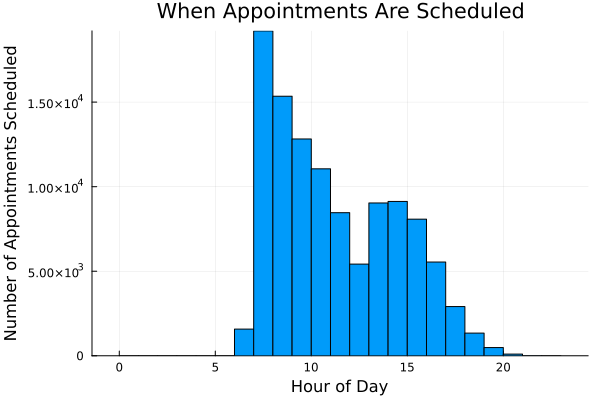

In [50]:
using Plots

# Histogram of scheduling hour
histogram(data.scheduled_hour, 
          bins=0:23, 
          xlabel="Hour of Day", 
          ylabel="Number of Appointments Scheduled",
          title="When Appointments Are Scheduled",
          legend=false)


Appointments by day of week:
  Monday: 22712 (20.55%)
  Tuesday: 25639 (23.2%)
  Wednesday: 25867 (23.41%)
  Thursday: 17244 (15.6%)
  Friday: 19018 (17.21%)
  Saturday: 39 (0.04%)


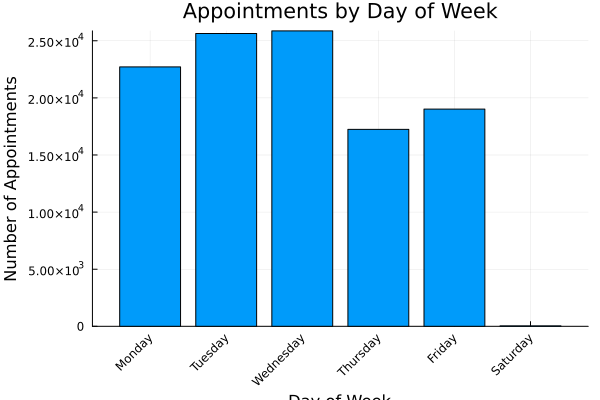

In [51]:
# Use your existing day_of_week feature
dow_counts = combine(groupby(data, :day_of_week), nrow => :count)

println("\nAppointments by day of week:")
for row in eachrow(dow_counts)
    pct = round(100 * row.count / nrow(data), digits=2)
    println("  $(row.day_of_week): $(row.count) ($(pct)%)")
end

# Bar chart
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_sorted = sort(dow_counts, :day_of_week)

bar(string.(dow_sorted.day_of_week), dow_sorted.count,
    xlabel="Day of Week",
    ylabel="Number of Appointments",
    title="Appointments by Day of Week",
    legend=false,
    xrotation=45)

In [52]:
# Average appointments per day by neighbourhood
neigh_daily = combine(groupby(data, [:Neighbourhood, :ScheduledDate]), nrow => :count)
neigh_daily_avg = combine(groupby(neigh_daily, :Neighbourhood)) do df
    DataFrame(avg_per_day = mean(df.count))
end
sort!(neigh_daily_avg, :avg_per_day, rev=true)

println("\nTop 10 busiest neighbourhoods (avg appointments/day):")
println(first(neigh_daily_avg, 10))

println("\nTop 10 slowest neighbourhoods (avg appointments/day):")
println(last(neigh_daily_avg, 10))


Top 10 busiest neighbourhoods (avg appointments/day):
10×2 DataFrame
 Row │ Neighbourhood     avg_per_day
     │ String31          Float64
─────┼───────────────────────────────
   1 │ JARDIM CAMBURI       104.284
   2 │ MARIA ORTIZ          101.825
   3 │ JARDIM DA PENHA       66.8448
   4 │ ITARARÉ               59.5593
   5 │ TABUAZEIRO            56.9455
   6 │ BONFIM                54.3725
   7 │ SANTO ANTÔNIO         53.8431
   8 │ RESISTÊNCIA           52.75
   9 │ ILHA DO PRÍNCIPE      52.6977
  10 │ SANTA MARTHA          50.5

Top 10 slowest neighbourhoods (avg appointments/day):
10×2 DataFrame
 Row │ Neighbourhood                avg_per_day
     │ String31                     Float64
─────┼──────────────────────────────────────────
   1 │ UNIVERSITÁRIO                    4.10811
   2 │ SEGURANÇA DO LAR                 3.625
   3 │ MORADA DE CAMBURI                3.31034
   4 │ NAZARETH                         2.93478
   5 │ PONTAL DE CAMBURI                2.46429
   6 │ ILH

In [40]:
#split data into train and test sets
using Random
Random.seed!(42)  # for reproducibility

data.Age_std = (data.Age .- mean(data.Age)) ./ std(data.Age)
data.lead_time_std = (data.lead_time .- mean(data.lead_time)) ./ std(data.lead_time)
data.neighbourhood_encoded_std = (data.neighbourhood_encoded .- mean(data.neighbourhood_encoded)) ./ std(data.neighbourhood_encoded)

n = nrow(data)
shuffled_indices = shuffle(1:n)
train_size = Int(round(0.8 * n))
train_indices = shuffled_indices[1:train_size]
test_indices = shuffled_indices[train_size+1:end]
train_data = data[train_indices, :]
test_data = data[test_indices, :]


Row,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDT,AppointmentDT,ScheduledDate,AppointmentDate,lead_time,no_show_binary,Age_std,lead_time_std,neighbourhood_encoded,neighbourhood_encoded_std,Gender_binary
,Float64,Int64,String1,String31,String31,Int64,String31,Int64,Int64,Int64,Int64,Int64,Int64,String3,DateTime,DateTime,Date,Date,Int64,Int64,Float64,Float64,Float64,Float64,Int64
1,3.36982e13,5590103,M,2016-04-15T13:35:36Z,2016-05-10T00:00:00Z,51,CARATOÍRA,0,0,0,0,0,0,No,2016-04-15T13:35:36,2016-05-10T00:00:00,2016-04-15,2016-05-10,25,0,0.601947,0.971242,0.230409,1.06328,0
2,5.42815e13,5665142,F,2016-05-05T14:00:49Z,2016-05-09T00:00:00Z,36,DO QUADRO,1,0,0,0,0,0,No,2016-05-05T14:00:49,2016-05-09T00:00:00,2016-05-05,2016-05-09,4,0,-0.0471166,-0.405356,0.1649,-1.38275,1
3,2.13285e14,5710636,F,2016-05-17T17:00:17Z,2016-05-18T00:00:00Z,50,DA PENHA,1,0,0,0,0,0,No,2016-05-17T17:00:17,2016-05-18T00:00:00,2016-05-17,2016-05-18,1,0,0.558676,-0.602013,0.193505,-0.314683,1
4,1.2273e13,5773550,F,2016-06-06T07:19:13Z,2016-06-06T00:00:00Z,4,ITARARÉ,0,0,0,0,0,0,No,2016-06-06T07:19:13,2016-06-06T00:00:00,2016-06-06,2016-06-06,0,0,-1.43179,-0.667565,0.262664,2.26762,1
5,9.29937e14,5722018,M,2016-05-20T07:00:12Z,2016-05-24T00:00:00Z,40,SANTO ANDRÉ,0,0,0,0,0,1,No,2016-05-20T07:00:12,2016-05-24T00:00:00,2016-05-20,2016-05-24,4,0,0.125967,-0.405356,0.197588,-0.162202,0
6,3.72488e14,5767007,M,2016-06-02T16:14:02Z,2016-06-02T00:00:00Z,59,JARDIM CAMBURI,0,0,0,0,0,0,No,2016-06-02T16:14:02,2016-06-02T00:00:00,2016-06-02,2016-06-02,0,0,0.948115,-0.667565,0.189841,-0.451497,0
7,5.83874e14,5782624,M,2016-06-07T11:52:41Z,2016-06-07T00:00:00Z,62,RESISTÊNCIA,0,1,1,0,0,0,No,2016-06-07T11:52:41,2016-06-07T00:00:00,2016-06-07,2016-06-07,0,0,1.07793,-0.667565,0.204469,0.0946892,0
8,8.63897e13,5624395,F,2016-04-26T15:54:11Z,2016-05-24T00:00:00Z,24,PRAIA DO SUÁ,0,0,0,0,0,1,Yes,2016-04-26T15:54:11,2016-05-24T00:00:00,2016-04-26,2016-05-24,28,1,-0.566368,1.1679,0.228261,0.983063,1
9,3.99795e13,5569380,M,2016-04-11T17:24:22Z,2016-06-06T00:00:00Z,82,JARDIM CAMBURI,0,0,0,0,0,1,Yes,2016-04-11T17:24:22,2016-06-06T00:00:00,2016-04-11,2016-06-06,56,1,1.94335,3.00336,0.189841,-0.451497,0


In [41]:
#fit a logistic regression model
using GLM
#standardize


formula = @formula(no_show_binary ~ Age_std + Gender_binary + Scholarship + 
                   Hipertension + Diabetes + SMS_received + lead_time_std + 
                   neighbourhood_encoded_std)

logit_model = glm(formula, train_data, Binomial(), LogitLink())
println(logit_model)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

no_show_binary ~ 1 + Age_std + Gender_binary + Scholarship + Hipertension + Diabetes + SMS_received + lead_time_std + neighbourhood_encoded_std

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                                Coef.  Std. Error       z  Pr(>|z|)   Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                -1.58291    0.0170409   -92.89    <1e-99  -1.61631    -1.54951
Age_std                    -0.164957   0.010261    -16.08    <1e-57  -0.185069   -0.144846
Gender_binary               0.0130763  0.0183094     0.71    0.4751  -0.0228095   0.0489622
Scholarship                 0.200492   0.0277039     7.24    <1e-

In [42]:
# check on test
using StatsBase
pred_probs = predict(logit_model, test_data)
pred_labels = ifelse.(pred_probs .>= 0.5, 1, 0)
confusion_matrix = freqtable(test_data.no_show_binary, pred_labels)
println("Confusion Matrix:")
println(confusion_matrix)

println("Accuracy: ", round(sum(diag(confusion_matrix)) / sum(confusion_matrix), digits=3))

Confusion Matrix:
[17538 104; 4394 69]
Accuracy: 0.797
